In [2]:
import numpy as np 
import pandas as pd
import matplotlib. pyplot as plt 
from scipy.stats import norm
import scipy
import yfinance as yf 
from tabulate import tabulate 

In [50]:
##Making a list of stock
stocks = ["AAPL","TSLA","SHEL","MSFT","GOOGL","QYLD","BABA"]
weights = [0.17,0.11,0.3,0.26,0.8,0.3,0.32]

In [9]:
def get_portfolio_data(stocks, start:str, end:str) -> pd.DataFrame:
    """Gets portfolio asset daily returns for a give period"""
    stock_data = yf.download(stocks, start, end, progress=False)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    return returns

In [10]:
# Time horizon
start = '2021-01-01'
end = '2023-03-31'

# Portfolio 1: asset returns
stock_returns = get_portfolio_data(stocks, start, end)

In [39]:
stocks_returns = stock_returns.dropna()
stocks_returns

,AAPL,BABA,GOOGL,MSFT,QYLD,SHEL,TSLA
Date,,,,,,,
2021-01-05,0.012364,0.055080,0.008064,0.000965,0.004848,0.068832,0.007317
2021-01-06,-0.033662,-0.053203,-0.009868,-0.025929,-0.005263,0.046222,0.028390
2021-01-07,0.034123,-0.003119,0.029869,0.028457,0.013668,0.001241,0.079447
2021-01-08,0.008631,0.040943,0.013239,0.006093,0.002610,-0.002479,0.078403
2021-01-11,-0.023249,-0.037343,-0.023106,-0.009699,-0.002169,0.000497,-0.078214
...,...,...,...,...,...,...,...
2023-03-24,0.008306,0.004392,-0.001515,0.010480,0.000591,-0.025013,-0.009416
2023-03-27,-0.012293,-0.008976,-0.028263,-0.014934,0.000591,0.023273,0.007353
2023-03-28,-0.003980,0.142592,-0.013957,-0.004161,-0.001181,0.005910,-0.013659


## Value at Risk
There are two main methods to compute VAR -

Parametric
Historical

### Parametric VAR 

Very often, the parametric VAR is based on a normal distribution. Plotting a normal distribution and the VAR on a chart will give us a good overview of how this works.

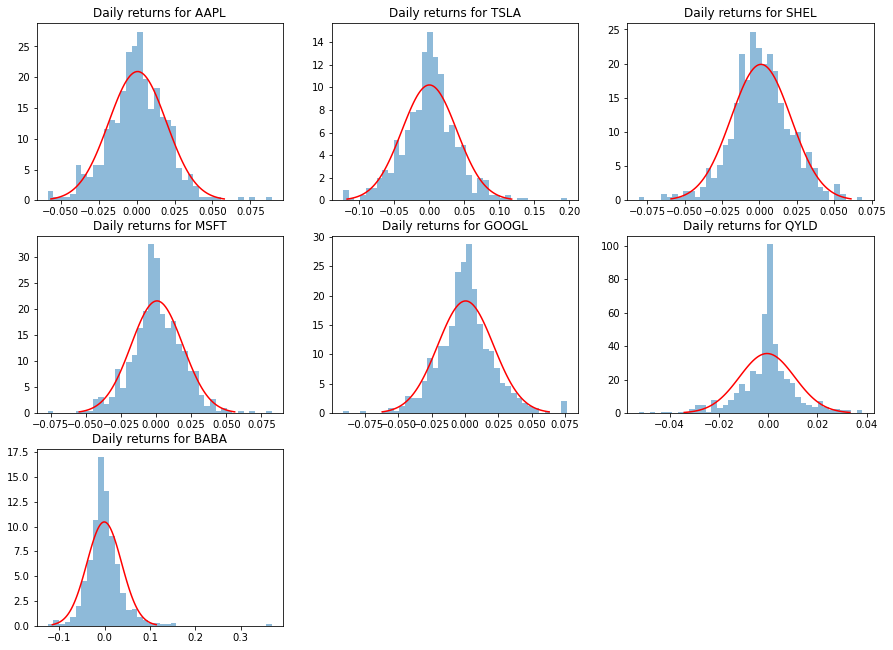

In [48]:
# Histogram of returns (overview of return distribution)
plt.figure(figsize=(15,15))

for i, ticker in enumerate(stocks):
  # New subplot for each stock
  plt.subplot(4, 3, i + 1)
  plt.title(f"Daily returns for {ticker}")

  # Histogram of returns
  plt.hist(stock_returns[ticker], bins=40, density=True, histtype='stepfilled', alpha=0.5)

  # Standard normal for stock returns
  mean = stock_returns[ticker].mean()
  std_dev = stock_returns[ticker].std()
  x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
  plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")

In [95]:
##Calculating overall portfolio returns, mean and standard deviation
portfolio_rtn = stocks_returns*weights
portfolio_rtn = portfolio_rtn.sum(axis=1)
portfolio_rtn

Date
2021-01-05    0.037700
2021-01-06   -0.002536
2021-01-07    0.058547
2021-01-08    0.037960
2021-01-11   -0.044128
                ...   
2023-03-24   -0.005879
2023-03-27   -0.005631
2023-03-28    0.006196
2023-03-29    0.029804
2023-03-30    0.016258
Length: 563, dtype: float64

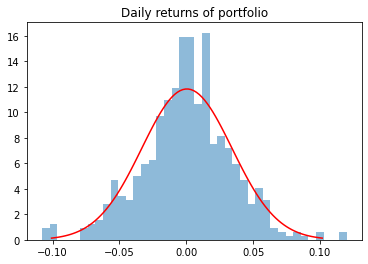

In [59]:
##Plotting histogram of portfolio returns
plt.hist(portfolio_rtn, bins=40, density=True, histtype='stepfilled', alpha=0.5)
plt.title("Daily returns of portfolio")
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev),"r")
plt.show()

In [70]:
##Calculating in dollar amount
initial_investment = 5000
weights = np.array([0.17,0.11,0.3,0.26,0.8,0.3,0.32])
weights

array([0.17, 0.11, 0.3 , 0.26, 0.8 , 0.3 , 0.32])

In [73]:
# Generate Var-Cov matrix
cov_matrix = stock_returns.cov()
cov_matrix

,AAPL,BABA,GOOGL,MSFT,QYLD,SHEL,TSLA
AAPL,0.000363,0.000228,0.000280,0.000267,0.000163,0.000072,0.000424
BABA,0.000228,0.001452,0.000235,0.000189,0.000171,0.000099,0.000502
GOOGL,0.000280,0.000235,0.000436,0.000308,0.000161,0.000088,0.000361
MSFT,0.000267,0.000189,0.000308,0.000340,0.000157,0.000059,0.000345
QYLD,0.000163,0.000171,0.000161,0.000157,0.000125,0.000053,0.000254
SHEL,0.000072,0.000099,0.000088,0.000059,0.000053,0.000402,0.000107
TSLA,0.000424,0.000502,0.000361,0.000345,0.000254,0.000107,0.001527


In [74]:
# Calculate mean returns for each stock
avg_rets = stock_returns.mean()

# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
port_mean = avg_rets.dot(weights)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment

# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [87]:
#Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [88]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1


275.42255726404437

1 day VaR @ 95% confidence: 390.4
2 day VaR @ 95% confidence: 552.11
3 day VaR @ 95% confidence: 676.19
4 day VaR @ 95% confidence: 780.79
5 day VaR @ 95% confidence: 872.96
6 day VaR @ 95% confidence: 956.27
7 day VaR @ 95% confidence: 1032.89
8 day VaR @ 95% confidence: 1104.21
9 day VaR @ 95% confidence: 1171.19
10 day VaR @ 95% confidence: 1234.55
11 day VaR @ 95% confidence: 1294.8
12 day VaR @ 95% confidence: 1352.38
13 day VaR @ 95% confidence: 1407.6
14 day VaR @ 95% confidence: 1460.73
15 day VaR @ 95% confidence: 1512.0


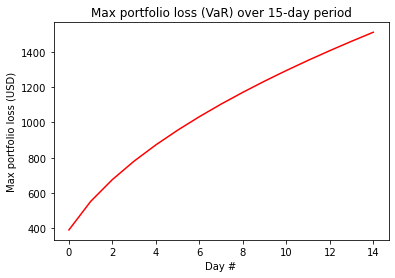

In [80]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

### Historic VAR

In [99]:
# Calculate the daily dollar return
daily_dollar_return = initial_investment * portfolio_rtn

# Calculate the cumulative dollar return
cumulative_dollar_return = daily_dollar_return.cumsum()

In [100]:
portfolio_value = initial_investment + cumulative_dollar_return
portfolio_value

Date
2021-01-05    5188.500273
2021-01-06    5175.821652
2021-01-07    5468.557382
2021-01-08    5658.357137
2021-01-11    5437.716640
                 ...     
2023-03-24    5938.343315
2023-03-27    5910.186883
2023-03-28    5941.169053
2023-03-29    6090.190246
2023-03-30    6171.481322
Length: 563, dtype: float64

In [108]:
SortedHistData = portfolio_value.sort_values(ascending = False)
SortedHistData

Date
2022-04-04    7983.991512
2021-11-05    7930.914182
2021-11-04    7927.061164
2021-11-03    7880.920324
2021-11-08    7870.519749
                 ...     
2023-01-04    4106.182796
2022-12-27    4052.981674
2023-01-03    4020.519272
2022-12-28    3955.070174
2023-01-05    3947.294872
Length: 563, dtype: float64

In [113]:
# Calculate the VaR 
VaR_90 = cumulative_dollar_return.quantile(0.1)
VaR_95 = cumulative_dollar_return.quantile(0.05)
VaR_99 = cumulative_dollar_return.quantile(0.01)

print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                         109.18
95%                        -244.015
99%                        -775.41


The values above imply the confidence level of the particular “value” that is at a risk of being lost.

At a 95% of confidence that the loss of value may be -0.0550845 and not more and there is 99% confidence that the loss will go to -0.0780795 and not beyond. Since all the values at risk are in negative, the probability is higher that the portfolio will return more than invested amount.